<a href="https://colab.research.google.com/github/Leonardopedroti/Modelagem-hidrol-gica/blob/main/Modelagem_Hidrol%C3%B3gica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import plot
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy
from sympy.core.numbers import NaN
from datetime import time

In [ ]:
#Dados de entrada
pd.set_option('display.precision', 3)
pd.options.display.colheader_justify = 'center'
df = pd.DataFrame({
    '>Sub-bacia': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    '>Curso dágua': ['n/d', 'n/d', 'n/d', 'n/d', 'n/d', 'n/d', 'n/d', 'n/d', 'n/d'],
    '>Área (km²)': [2.17, 0.5, 0.676, 0.331, 2.058, 2.8, 0.573, 0.16, 0.164],
    #CN precisa ser feito
    '>CN': [78.88, 85.22, 86.24, 74.83, 75.65, 77.72, 80.70, 77, 80.14],
    '>Compr. rio principal (km)': [2.06, 1, 0.5, 0.57, 2.07, 2.62, 0.77, 0.26, 0.34],
    '>cota mont.(m)': [680, 690, 635, 610, 655, 650, 609, 595, 593],
    '>cota jusa.(m)': [610, 610, 609, 609, 595, 593, 595, 593, 590]
})
display(df)

,>Sub-bacia,>Curso dágua,>Área (km²),>CN,>Compr. rio principal (km),>cota mont.(m),>cota jusa.(m)
0,1,n/d,2.170,78.88,2.06,680,610
1,2,n/d,0.500,85.22,1.00,690,610
2,3,n/d,0.676,86.24,0.50,635,609
3,4,n/d,0.331,74.83,0.57,610,609
4,5,n/d,2.058,75.65,2.07,655,595
5,6,n/d,2.800,77.72,2.62,650,593
6,7,n/d,0.573,80.70,0.77,609,595
7,8,n/d,0.160,77.00,0.26,595,593
8,9,n/d,0.164,80.14,0.34,593,590


In [ ]:
# Função para somar a área total e o comprimento total
def somar_area_comprimento_total(dataframe):
    area_total = dataframe['>Área (km²)'].sum()
    comprimento_total = dataframe['>Compr. rio principal (km)'].sum()
    return area_total, comprimento_total

# Chamando a função
area_total, comprimento_total = somar_area_comprimento_total(df)

# Criando um novo DataFrame com os resultados
resultados_df = pd.DataFrame({'Área Total (km²)': [area_total], 'Comprimento Total (km)': [comprimento_total]})

# área total:
area_total = resultados_df.loc[0, 'Área Total (km²)']

#comprimento total:
comprimento_total = resultados_df.loc[0, 'Comprimento Total (km)']

# Exibindo o DataFrame com os resultados
display(resultados_df)

,Área Total (km²),Comprimento Total (km)
0,9.432,10.19


In [ ]:
#cálculo da declividade do rio principal (s) (m/m)
df['Declividade (m/m)'] = (df['>cota mont.(m)'] - df['>cota jusa.(m)']) / (df['>Compr. rio principal (km)'] * 1000)

#DataFrame com a declividade
display(df[['>Sub-bacia', 'Declividade (m/m)']])

,>Sub-bacia,Declividade (m/m)
0,1,0.034
1,2,0.080
2,3,0.052
3,4,0.002
4,5,0.029
5,6,0.022
6,7,0.018
7,8,0.008
8,9,0.009


In [ ]:
# Cálculo de Tc Kirpich
df['Tc Kirpich (min)'] = 3.989 * (df['>Compr. rio principal (km)'] ** 0.77) * (df['Declividade (m/m)'] ** -0.385)

# Cálculo do lag time
df['lag time (min)'] = df['Tc Kirpich (min)'] * 0.6

# Exibindo o DataFrame com o resultado
display(df[['>Compr. rio principal (km)', 'Declividade (m/m)', 'Tc Kirpich (min)', 'lag time (min)']])

,>Compr. rio principal (km),Declividade (m/m),Tc Kirpich (min),lag time (min)
0,2.06,0.034,25.587,15.352
1,1.00,0.080,10.548,6.329
2,0.50,0.052,7.301,4.381
3,0.57,0.002,29.778,17.867
4,2.07,0.029,27.304,16.382
5,2.62,0.022,36.559,21.935
6,0.77,0.018,15.258,9.155
7,0.26,0.008,9.210,5.526
8,0.34,0.009,10.741,6.444


In [ ]:
# Criação do DataFrame para declividade
dfu = pd.DataFrame({
    'Comprimento do rio principal (km)': [4], # Ajuste o valor de comprimento do rio principal conforme necessário
    'cota mont.': [680], # Ajuste o valor da cota montante conforme necessário
    'cota jus.': [590] # Ajuste o valor da cota jusante conforme necessário
})

# Calculo da declividade do rio principal
declividade = ((dfu['cota mont.'] - dfu['cota jus.']) / (dfu['Comprimento do rio principal (km)'] * 1000)).values[0]

# Exibição do valor da declividade
declividade_df = pd.DataFrame({'Declividade do rio principal (s) (m/m)': [declividade]})

# Criando DataFrames com os valores necessários para Tc Kirpich
dfu = pd.DataFrame({'Comprimento do rio principal (km)': [4]})
dfb = pd.DataFrame({'Declividade rio principal (s) (m/m)': [0.0225]})  # Ajuste o valor da declividade conforme necessário

# Cálculo de Tc Kirpich
tc_kirpich = (3.989 * (dfu['Comprimento do rio principal (km)'] ** 0.77) * (dfb['Declividade rio principal (s) (m/m)'] ** -0.385))

# Exibindo o valor de Tc Kirpich
formatted_tc_kirpich = "{:.2f}".format(tc_kirpich.values[0])
tc_kirpich_df = pd.DataFrame({'Tc Kirpich (min)': [formatted_tc_kirpich]})

# Tempo de retorno em anos
retorno_df =  pd.DataFrame({'Tr (anos)': [25]}) # Ajuste o valor do tempo de retorno conforme necessário

# curva IDF - Itararé (SP)
dfd = pd.DataFrame({'TR (anos)': [25], 't = tc': [49.99]})

# Concatenando os DataFrames
resultados_df = pd.concat([declividade_df, tc_kirpich_df, retorno_df], axis=1)

# Exibindo o DataFrame com os resultados
display(resultados_df)


,Declividade do rio principal (s) (m/m),Tc Kirpich (min),Tr (anos)
0,0.022,49.99,25


In [ ]:
# curva IDF - Itararé (SP)
dfd = pd.DataFrame({'TR (anos)': [25], 't = tc': [49.99]})

# Cálculo da curva IDF
var1 = dfd['TR (anos)']
var2 = dfd['t = tc']

idf = 20.0196 * (var2 + 10) ** -0.7961 + 11.4493 * (var2 + 10) ** -0.92224 * (-0.4778 - 0.9046 * np.log(np.log(var1 / (var1 - 1))))

# Exibindo os resultados
idf_result = pd.DataFrame({'Curva IDF': idf})

#precipitação efetiva
precipitacao_efetiva = pd.DataFrame({'Precipitação Efetiva': dfd['t = tc'] * idf_result['Curva IDF']})

#Intervalo da chuva
Intervalo_da_chuva = pd.DataFrame({'Intervalo da chuva': [5]}) # Ajuste o valor do intervalo da chuva conforme o necessário

#Duração da precipitação em minutos
Duracao_precipitacao = pd.DataFrame({'Duração precipitação (min)': [49.99 * 0.133]})

#tempo de pico do Hidrograma únitario sintético em min
min = Duracao_precipitacao['Duração precipitação (min)']
tempo_de_pico_min = pd.DataFrame({'vazão de pico m³/s': (min / 2 + 0.6 * dfd['t = tc']) / 60})

#tempo de pico do Hidrograma únitario sintético em s
tempo_de_pico_seg = pd.DataFrame({'Tempo de pico (s)': min / 2 + 0.6 * dfd['t = tc']})

#tempo de base do Hidrograma únitario sintético em minutos
tempo_base = pd.DataFrame({'tempo de base (min)': tempo_de_pico_seg['Tempo de pico (s)']*2.67})

#vazão de pico do HUS em m³/s
area = area_total  # Área Total (km²)
peaktime = tempo_de_pico_min  # Tempo de pico (s)

vazao_pico = 2.08 * (area / peaktime)


# Concatenando os DataFrames
resultados_df = pd.concat([declividade_df, tc_kirpich_df, retorno_df, idf_result, precipitacao_efetiva, Intervalo_da_chuva, Duracao_precipitacao, tempo_de_pico_min, tempo_de_pico_seg, tempo_base, vazao_pico], axis=1)

# Exibindo o DataFrame com os resultados
display(resultados_df)

,Declividade do rio principal (s) (m/m),Tc Kirpich (min),Tr (anos),Curva IDF,Precipitação Efetiva,Intervalo da chuva,Duração precipitação (min),vazão de pico m³/s,Tempo de pico (s),tempo de base (min),vazão de pico m³/s
0,0.022,49.99,25,1.403,70.129,5,6.649,0.555,33.318,88.96,35.329


In [ ]:
#Ietograma de projeto

#passo 1:
time1 = pd.DataFrame({'Tempo(min)': list(range(0, 51, 5))})

#passo 2:
time1['Tempo (H)'] = time1['Tempo(min)'] / 60

time1_rounded = time1.round(3) # Arredondamento dos valores

#passo 3:
precipitacaoefetiva = pd.Series(precipitacao_efetiva['Precipitação Efetiva'])
dfd = pd.Series(dfd['t = tc'])
Intervalodachuva = pd.Series(Intervalo_da_chuva['Intervalo da chuva'])

resultado = (precipitacaoefetiva / dfd) * Intervalodachuva

#tabela
resultados_df2 = pd.concat([time1, resultado], axis=1)
display(resultados_df2)

,Tempo(min),Tempo (H),0
0,0,0.000,7.014
1,5,0.083,NaN
2,10,0.167,NaN
3,15,0.250,NaN
4,20,0.333,NaN
5,25,0.417,NaN
6,30,0.500,NaN
7,35,0.583,NaN
8,40,0.667,NaN
9,45,0.750,NaN


In [ ]:
#passo 4:
dfk = pd.DataFrame({
    'P distribuido (mm)': [0.0000] + [7.014] * 10})

#passo 5:
intervalo = pd.DataFrame({
    'intervalo': list(range(11))})

resultados_df3 = pd.concat([intervalo, dfk, time1], axis=1)
display(resultados_df3)

,intervalo,P distribuido (mm),Tempo(min),Tempo (H)
0,0,0.000,0,0.000
1,1,7.014,5,0.083
2,2,7.014,10,0.167
3,3,7.014,15,0.250
4,4,7.014,20,0.333
5,5,7.014,25,0.417
6,6,7.014,30,0.500
7,7,7.014,35,0.583
8,8,7.014,40,0.667
9,9,7.014,45,0.750


<ipython-input-59-a8f0de87d43e>:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



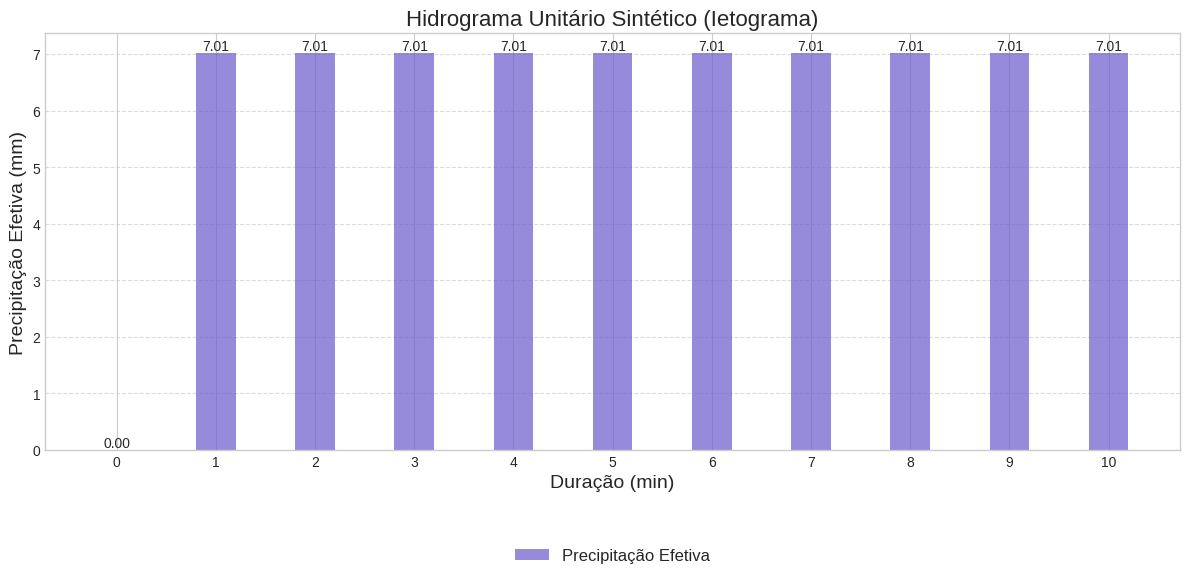

In [ ]:
# Configurações do gráfico
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')

# Valores dos dados
intervalo = intervalo['intervalo'].values
precipitacao_efetiva = dfk['P distribuido (mm)'].values

# Plotagem do gráfico
plt.bar(intervalo, precipitacao_efetiva, color='#6A5ACD', alpha=0.7, width=0.4, label='Precipitação Efetiva')
plt.xticks(intervalo)

# Configurações do gráfico
plt.ylabel('Precipitação Efetiva (mm)', size=14)
plt.xlabel('Duração (min)', size=14)
plt.title('Hidrograma Unitário Sintético (Ietograma)', size=16)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando rótulos nas barras
for x, y in zip(intervalo, precipitacao_efetiva):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)

# Movendo a legenda para abaixo do gráfico
plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.2))

plt.tight_layout()
plt.show()


In [ ]:
# Tempo de subida do HUS em (min)
valor_base = Duracao_precipitacao.values
menor = pd.DataFrame({str(i): [valor_base * (i + 1)] for i in range(12)})
display(menor)

,0,1,2,3,4,5,6,7,8,9,10,11
0,[[6.648670000000001]],[[13.297340000000002]],[[19.94601]],[[26.594680000000004]],[[33.24335000000001]],[[39.89202]],[[46.540690000000005]],[[53.18936000000001]],[[59.83803000000001]],[[66.48670000000001]],[[73.13537000000001]],[[79.78404]]


In [ ]:
# Extrair os seis primeiros valores
seis_primeiros = pd.DataFrame({'Ramo ascendente': [0] + menor.iloc[0, :6].values.tolist()})

# Exibir os valores com menos casas decimais
seis_primeiros['Ramo ascendente'] = seis_primeiros['Ramo ascendente'].apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)

# Excluir a célula 5
seis_primeiros = seis_primeiros.drop(6)

# Reiniciar os índices
seis_primeiros = seis_primeiros.reset_index(drop=True)

# Remover os colchetes do output
seis_primeiros['Ramo ascendente'] = seis_primeiros['Ramo ascendente'].apply(lambda x: str(x))

# Remover os colchetes do output
seis_primeiros['Ramo ascendente'] = seis_primeiros['Ramo ascendente'].str.strip('[]')

# Exibir o resultado
display(seis_primeiros)


,Ramo ascendente
0,0
1,6.64867
2,13.29734
3,19.94601
4,26.59468
5,33.24335


In [ ]:
#Convulação
convulacao = pd.DataFrame({
    'Qp x Pef(discr.)': [35.329 * 7.014]}) #7.014 correspondente ao precipitação efetiva distribuida (mm)
display(convulacao)

,Qp x Pef(discr.)
0,247.798


In [ ]:
#ramo ascendente
duraçao = pd.DataFrame([0, 6.65, 13.3,	19.95,	26.6, 33.25])
Qp = pd.Series([247.8])
tempodepico = tempo_de_pico_seg['Tempo de pico (s)']
(pd.DataFrame((Qp/tempodepico)*duraçao)).round(2)

,0
0,0.00
1,49.46
2,98.92
3,148.38
4,197.83
5,247.29


In [ ]:
#ramo descendente
#obs: esta dando negativo, porém o valor é 0
duraçao2 = pd.DataFrame([39.9, 46.55, 53.2, 59.85, 66.5, 73.15, 79.8, 86.45, 93.1])
Qp = pd.Series([247.8])
tempodepico = tempo_de_pico_seg['Tempo de pico (s)']
tempodebase = pd.Series(tempo_base['tempo de base (min)'])
(pd.DataFrame(((tempodebase-duraçao2)/(tempodebase-tempodepico))*Qp)).round(2)

,0
0,218.49
1,188.87
2,159.26
3,129.64
4,100.03
5,70.41
6,40.79
7,11.18
8,-18.44


In [ ]:
from sympy.core.numbers import NaN
#convulaçao
tabela1 = pd.DataFrame({
    'Duraçao (min)': [0, 6.65, 13.3,	19.95,	26.6, 33.25, 39.9, 46.55, 53.2, 59.85, 66.5, 73.15, 79.8, 86.45, 93.1, 99.75, 106.4, 113.05, 119.7, 126.35, 133.00, 139.65, 146.30, 152.95, 159.60],
    'Q1 (m³/s)': [0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Q2 (m³/s)': [np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Q3 (m³/s)': [np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Q4 (m³/s)': [np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Q5 (m³/s)': [np.nan, np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Q6 (m³/s)': [np.nan, np.nan, np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
    'Q7 (m³/s)': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan, np.nan],
    'Q8 (m³/s)': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan, np.nan],
    'Q9 (m³/s)': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan, np.nan],
    'Q10 (m³/s)': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0, np.nan],
    'Q11 (m³/s)': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, 49.49, 98.97, 148.46, 197.95, 247.43, 218.61, 188.98, 159.34, 129.71, 100.08, 70.45, 40.81, 11.18, 0]
})
display(tabela1)

In [ ]:
tabela2 = tabela1.drop('Duraçao (min)', axis=1).fillna(0)
display(tabela2)

,Q1 (m³/s),Q2 (m³/s),Q3 (m³/s),Q4 (m³/s),Q5 (m³/s),Q6 (m³/s),Q7 (m³/s),Q8 (m³/s),Q9 (m³/s),Q10 (m³/s),Q11 (m³/s)
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,49.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,98.97,49.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,148.46,98.97,49.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,197.95,148.46,98.97,49.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,247.43,197.95,148.46,98.97,49.49,0.00,0.00,0.00,0.00,0.00,0.00
6,218.61,247.43,197.95,148.46,98.97,49.49,0.00,0.00,0.00,0.00,0.00
7,188.98,218.61,247.43,197.95,148.46,98.97,49.49,0.00,0.00,0.00,0.00
8,159.34,188.98,218.61,247.43,197.95,148.46,98.97,49.49,0.00,0.00,0.00
9,129.71,159.34,188.98,218.61,247.43,197.95,148.46,98.97,49.49,0.00,0.00


In [ ]:
# Excluindo a coluna 'Duraçao (min)'
tabela2 = tabela1.drop(labels='Duraçao (min)', axis=1)

# Preenchendo valores NaN com 0
tabela2 = tabela2.fillna(0)

# Extraindo e somando as vazões resultantes
linha = tabela2.loc[list(range(25))]
Qresultante = pd.DataFrame({'Q(m³) resultante': linha.sum(axis=1)})

# Criando um dataframe com dados de duração e vazão resultante
HUSbacia = pd.DataFrame({'Duração (min)': tabela1['Duraçao (min)'].values,
                         'Qresultante': Qresultante['Q(m³) resultante'].values})
display(HUSbacia)


,Duração (min),Qresultante
0,0.00,0.00
1,6.65,49.49
2,13.30,148.46
3,19.95,296.92
4,26.60,494.87
5,33.25,742.30
6,39.90,960.91
7,46.55,1149.89
8,53.20,1309.23
9,59.85,1438.94


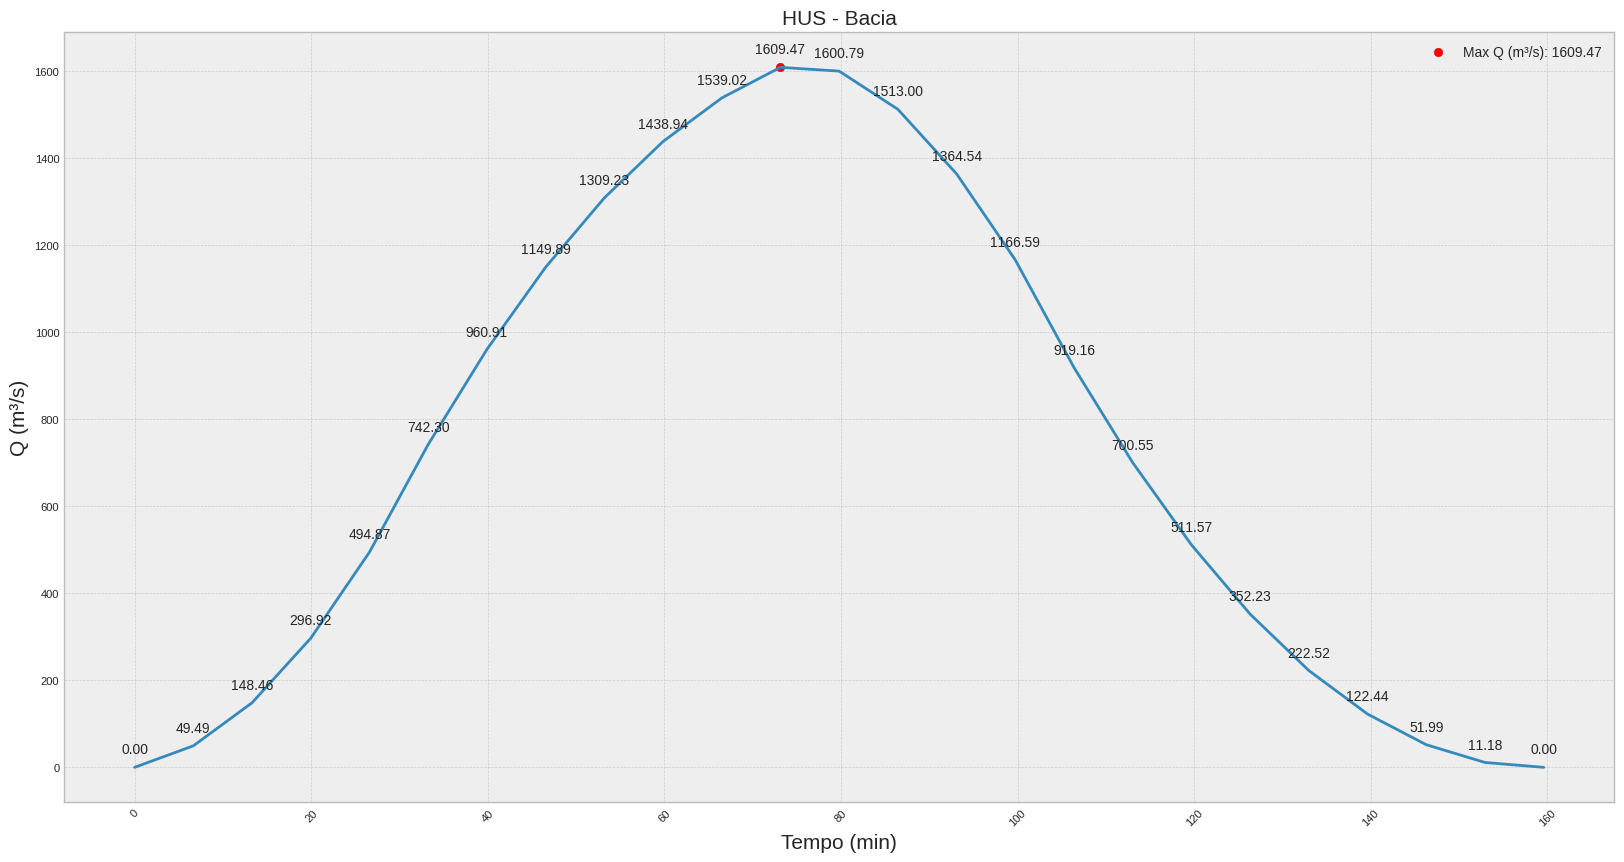

In [ ]:
# Seu código existente
Dm = HUSbacia['Duração (min)'].values
qresul = HUSbacia['Qresultante'].values
fig, ax = plt.subplots(1,1, figsize=(20, 10), dpi = 100)

# Adicionando rótulos aos pontos de dados
for i, txt in enumerate(qresul):
    ax.annotate(f'{txt:.2f}', (Dm[i], qresul[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Adicionando grade e legendas
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.style.use('bmh')
plt.tick_params(labelsize=8)
plt.title('HUS - Bacia', size=15)
plt.xlabel('Tempo (min)', size=15)
plt.ylabel('Q (m³/s)', size=15)

# Destacando pontos específicos (opcional)
# por exemplo, destacando o ponto máximo
max_qresul_index = qresul.argmax()
plt.scatter(Dm[max_qresul_index], qresul[max_qresul_index], color='red', label=f'Max Q (m³/s): {qresul[max_qresul_index]:.2f}')
plt.legend()

plt.plot(Dm, qresul)
plt.show()


In [ ]:
pip install tensorflow matplotlib pandas

A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 19ms/step
Epoch 6000, D Loss: 0.687435507774353, G Loss: 0.6735037565231323
1/1 [==============================] - 0s 25ms/step
Epoch 7000, D Loss: 0.6887153089046478, G Loss: 0.6792837381362915
1/1 [==============================] - 0s 16ms/step
Epoch 8000, D Loss: 0.7100497484207153, G Loss: 0.6449320912361145
1/1 [==============================] - 0s 15ms/step
Epoch 9000, D Loss: 0.6795609593391418, G Loss: 0.8366243243217468
1/1 [==============================] - 0s 19ms/step


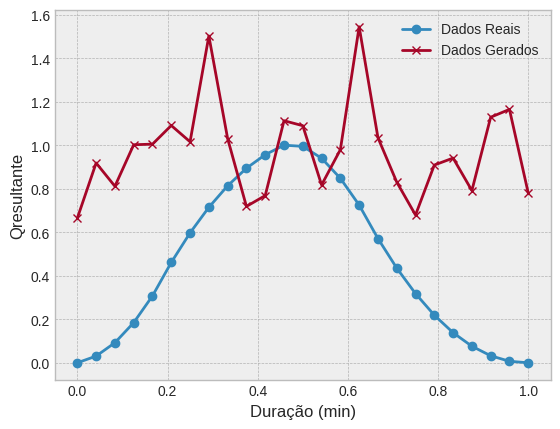

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input

# Carregando os dados
data = {
    'Duração (min)': [0.00, 6.65, 13.30, 19.95, 26.60, 33.25, 39.90, 46.55, 53.20, 59.85, 66.50, 73.15, 79.80, 86.45, 93.10, 99.75, 106.40, 113.05, 119.70, 126.35, 133.00, 139.65, 146.30, 152.95, 159.60],
    'Qresultante': [0.00, 49.49, 148.46, 296.92, 494.87, 742.30, 960.91, 1149.89, 1309.23, 1438.94, 1539.02, 1609.47, 1600.79, 1513.00, 1364.54, 1166.59, 919.16, 700.55, 511.57, 352.23, 222.52, 122.44, 51.99, 11.18, 0.00]
}

df = pd.DataFrame(data)

# Normalizando os dados
df['Duração (min)'] = df['Duração (min)'] / df['Duração (min)'].max()
df['Qresultante'] = df['Qresultante'] / df['Qresultante'].max()

# Função para criar o gerador
def build_generator():
    model = Sequential()
    model.add(Dense(32, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='linear'))
    return model

# Função para criar o discriminador
def build_discriminator():
    model = Sequential()
    model.add(Dense(32, input_dim=1, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Função para criar a rede GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Função para treinar o GAN
def train_gan(generator, discriminator, gan, data, epochs=10000, batch_size=10):
    for epoch in range(epochs):
        noise = np.random.normal(0, 1, (batch_size, 10))
        generated_data = generator.predict(noise)

        idx = np.random.randint(0, data.shape[0], batch_size)
        real_data = data[idx]

        labels_real = np.ones((batch_size, 1))
        labels_fake = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_data, labels_real)
        d_loss_fake = discriminator.train_on_batch(generated_data, labels_fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, 10))
        labels_gan = np.ones((batch_size, 1))

        g_loss = gan.train_on_batch(noise, labels_gan)

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

# Criando e treinando o GAN
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

train_gan(generator, discriminator, gan, df.values[:, 0].reshape(-1, 1))

# Gerando dados sintéticos
noise = np.random.normal(0, 1, (25, 10))
generated_data = generator.predict(noise)

# Desnormalizando os dados gerados
generated_data = generated_data * df['Qresultante'].max()

# Plotando os resultados
plt.plot(df['Duração (min)'], df['Qresultante'], label='Dados Reais', marker='o')
plt.plot(df['Duração (min)'], generated_data, label='Dados Gerados', marker='x')
plt.legend()
plt.xlabel('Duração (min)')
plt.ylabel('Qresultante')
plt.show()
